In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

FILE = 'data/dataset.csv'
df = pd.read_csv(FILE,sep=',')
Inputs = df['Inputs']
Directions = df['Directions'].values
Energy = df['Energy'].values
df.head()

,Inputs,Directions,Energy
0,HHHHP,SRRRL,1
1,HHHHP,SRRRF,1
2,HHHHP,SRLLR,1
3,HHHHP,SRLLF,1
4,HHHHP,SLRRL,1


In [129]:
dic = {}
for i,input in enumerate(Inputs):
    try:
        dic[input].append([Directions[i],Energy[i]])
    except:
        dic[input] = [[Directions[i],Energy[i]]]

data = {}

for key in dic.keys():
    max_energy = 0
    for _,energy in dic[key]:
        if max_energy < energy: 
            max_energy = energy
    data[key] = {'energy':max_energy,'directions':[]}

values = []

for key in dic.keys():
    for dir,energy in dic[key]:
        if energy == data[key]['energy']:
            data[key]['directions'].append(dir)
            values.append([key,dir])

In [130]:
vals = pd.DataFrame(values,columns=['Inputs','Directions'])
vals.head()
vals.iloc[100]

Inputs        HPPHH
Directions    SLRRL
Name: 100, dtype: object

In [147]:
len(vals)

22914

In [148]:
def make_tuples_v2(line):
    res = [(line['Inputs'][0],line['Inputs'][1],str(0),line['Directions'][1])]
    for i,input in enumerate(line['Inputs'][1:-1]):
        res.append((line['Inputs'][i+1],line['Inputs'][i+2],str(i+1),line['Directions'][i+2]))
    return res

def make_tuples(line):
    res = [('_',line['Inputs'][0],line['Inputs'][1],line['Directions'][1])]
    for i,input in enumerate(line['Inputs'][1:-1]):
        res.append((line['Inputs'][i],input,line['Inputs'][i+2],line['Directions'][i+2]))
    return res

combinations = vals.apply(make_tuples,axis=1)
combinations[0]

combinations_v2 = vals.apply(make_tuples_v2,axis=1)
combinations_v2[0]


[('H', 'H', '0', 'R'),
 ('H', 'H', '1', 'R'),
 ('H', 'H', '2', 'R'),
 ('H', 'P', '3', 'L')]

In [149]:
def tuple2string(t):
    s = ''
    for v in t:
        s += v
    return s

INSTRUCTIONS = []
for c in combinations.apply(lambda x: [tuple2string(v) for v in x]):
    INSTRUCTIONS += c

combinations_v2 = combinations_v2.apply(lambda x: [tuple2string(v) for v in x])
combinations_v2 = combinations_v2.values.tolist()

values = []
for v in combinations_v2:
  values += v

#values

In [150]:
data_hist = {}
INSTRUCTIONS.sort()
for inst in INSTRUCTIONS:
    try:
        data_hist[inst] += 1
    except:
        data_hist[inst] = 1
DATA_HIST = pd.DataFrame(list(zip(list(data_hist.keys()),list(data_hist.values()))),columns=['Case','Counts'])
DATA_HIST.head()

,Case,Counts
0,HHHF,5346
1,HHHL,9549
2,HHHR,9549
3,HHPF,7584
4,HHPL,7200


In [151]:
dic_cases = {}
for i,case in enumerate(DATA_HIST['Case'].values):
    try:
        dic_cases[case[:-1]]['N'] += DATA_HIST['Counts'].values[i]
    except:
        dic_cases[case[:-1]] = {'N':DATA_HIST['Counts'].values[i]}

for key in dic_cases.keys():
    for l in 'LRF':
        try:
            dic_cases[key][l] = DATA_HIST['Counts'].loc[DATA_HIST['Case'] == key+l].values[0]/dic_cases[key]['N']
        except:
            dic_cases[key][l] = 0
    dic_cases[key].pop('N')

Index(['HHH', 'HHP', 'HPH', 'HPP', 'PHH', 'PHP', 'PPH', 'PPP', '_HH', '_HP',
       '_PH', '_PP'],
      dtype='object')


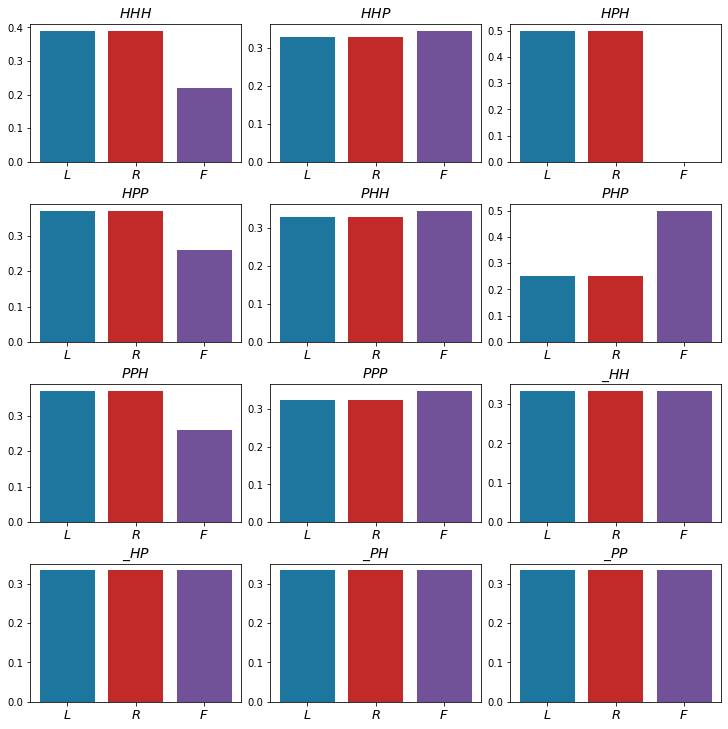

In [176]:
CASES = pd.DataFrame.from_dict(dic_cases)
fig,ax = plt.subplots(4,3,figsize=(10,10),constrained_layout=True)
#for i,col in enumerate(CASES.columns):
#    ax[i%4,i%3].set_title(f'{col}')
#    for j,row in enumerate(CASES[col]):
#        ax[i%4,i%3].bar(j,row)
#    ax[i%4,i%3].set_xticks([0,1,2])
#    ax[i%4,i%3].set_xticklabels(['L','R','F'])
#CASES.to_pickle('probs.pkl')
#CASES
print(CASES.columns)
import re
colors = ['#1C769D','#C22929','#715298']
for i in range(4):
    for j in range(3):
        s = re.sub('_',r'\_',CASES.columns[i*3+j])
        ax[i][j].set_title(f'${s}$',fontsize=14)
        col = CASES[CASES.columns[i*3+j]]
        for d in range(3):
            ax[i][j].bar(d,col[d],color=colors[d])
            ax[i][j].set_xticks(list(range(3)))
            ax[i][j].set_xticklabels([f'${c}$' for c in 'LRF'],fontsize=13)
CASES
PATH = 'C:/Users/reasc/OneDrive - Universidade do Minho (1)/Mestrado/Primer Semestre/PP/probabilistic_programming/Short Talks/Protein Fold 2D/Graficos/'
fig.savefig(PATH+'MODEL1.svg')

In [177]:
def lists_by_positions(values):
    list_0 = []
    list_1 = []
    list_2 = []
    list_3 = []
    list_4 = []
    list_5 = []
    list_6 = []
    for i in values:
        v = i[2]
        a = i[:2]+i[3]
        if (v == "0"):
            list_0.append(a)
        if (v == "1"):
            list_1.append(a)
        if (v == "2"):
            list_2.append(a)
        if (v == "3"):
            list_3.append(a)
        if (v == "4"):
            list_4.append(a) 
        if (v == "5"):
            list_5.append(a)  
        if (v == "6"):
            list_6.append(a)
    return[list_0,list_1,list_2,list_3,list_4,list_5,list_6]
    

data2 = lists_by_positions(values)

In [178]:
def get_probabilities(l):
    cases = {'HH':{'N':0,'L':0,'R':0,'F':0},'HP':{'N':0,'L':0,'R':0,'F':0},'PH':{'N':0,'L':0,'R':0,'F':0},'PP':{'N':0,'L':0,'R':0,'F':0}}
    for value in l:
        cases[value[:-1]]['N'] += 1
        cases[value[:-1]][value[-1]] += 1
    
    for case in cases.keys():
        for d in 'LRF':
            cases[case][d] /= cases[case]['N']
        cases[case].pop('N')
    CASES = pd.DataFrame.from_dict(cases)
    return CASES
    
def plot_hists(df):
    fig,ax = plt.subplots(2,2,figsize=(8,8),constrained_layout=True)
    pares = [(0,0),(1,0),(0,1),(1,1)]
    for i,col in enumerate(df.columns):
        a,b = pares[i]
        ax[a,b].set_title(f'{col}')
        for j,row in enumerate(df[col]):
            ax[a,b].bar(j,row)
        ax[a,b].set_xticks([0,1,2])
        ax[a,b].set_xticklabels(['L','R','F'])

Altura: 0


,HH,HP,PH,PP
L,0.333333,0.333333,0.333333,0.333333
R,0.333333,0.333333,0.333333,0.333333
F,0.333333,0.333333,0.333333,0.333333


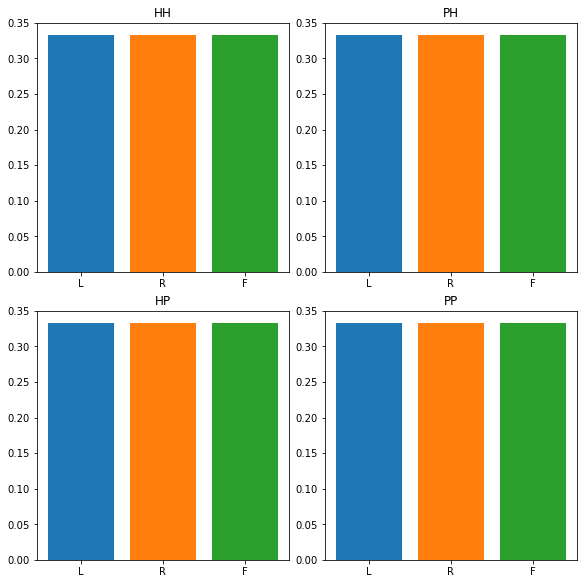

Altura: 1


,HH,HP,PH,PP
L,0.338736,0.327880,0.384226,0.351562
R,0.338736,0.327880,0.384226,0.351562
F,0.322528,0.344241,0.231547,0.296875


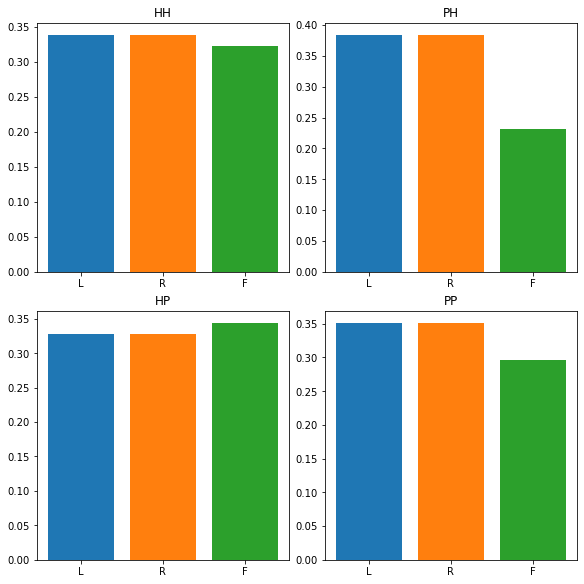

Altura: 2


,HH,HP,PH,PP
L,0.381710,0.312325,0.419145,0.378846
R,0.381710,0.312325,0.419145,0.378846
F,0.236581,0.375350,0.161710,0.242308


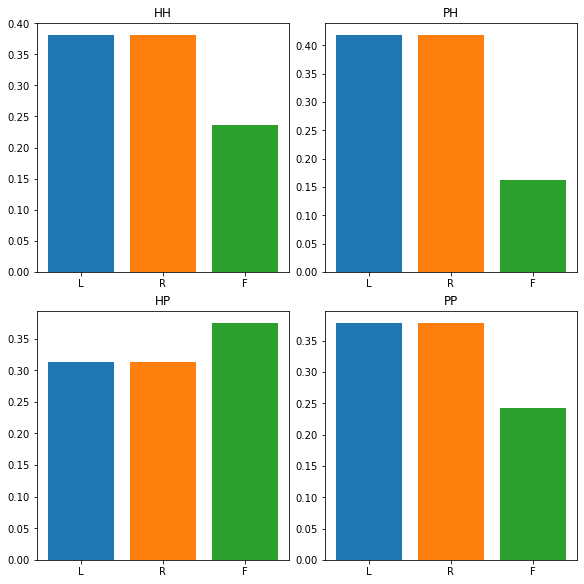

Altura: 3


,HH,HP,PH,PP
L,0.347090,0.278579,0.452467,0.388337
R,0.347090,0.278579,0.452467,0.388337
F,0.305819,0.442841,0.095066,0.223325


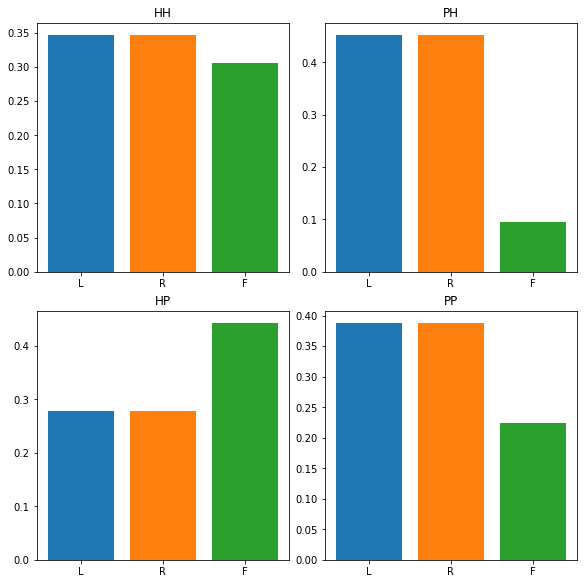

Altura: 4


,HH,HP,PH,PP
L,0.35913,0.297260,0.474734,0.367216
R,0.35913,0.297260,0.474734,0.367216
F,0.28174,0.405479,0.050532,0.265568


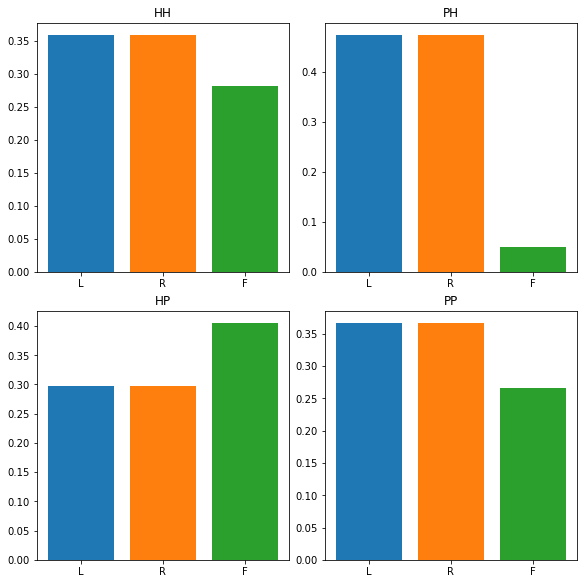

Altura: 5


,HH,HP,PH,PP
L,0.375108,0.322563,0.468845,0.333516
R,0.375108,0.322563,0.468845,0.333516
F,0.249784,0.354874,0.062310,0.332968


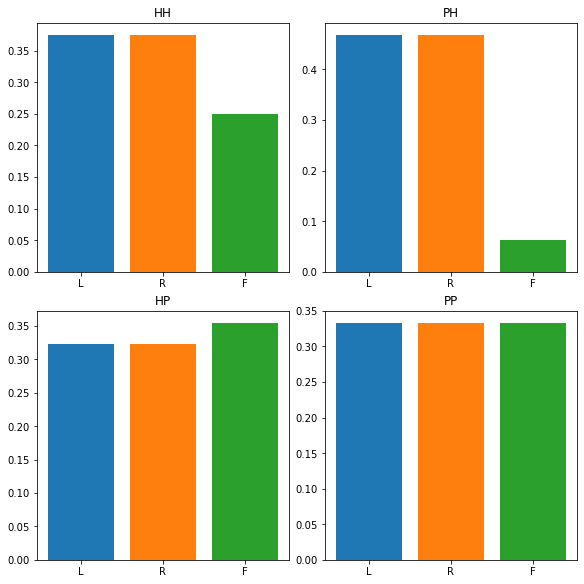

Altura: 6


,HH,HP,PH,PP
L,0.366356,0.300274,0.463087,0.323356
R,0.366356,0.300274,0.463087,0.323356
F,0.267287,0.399453,0.073826,0.353288


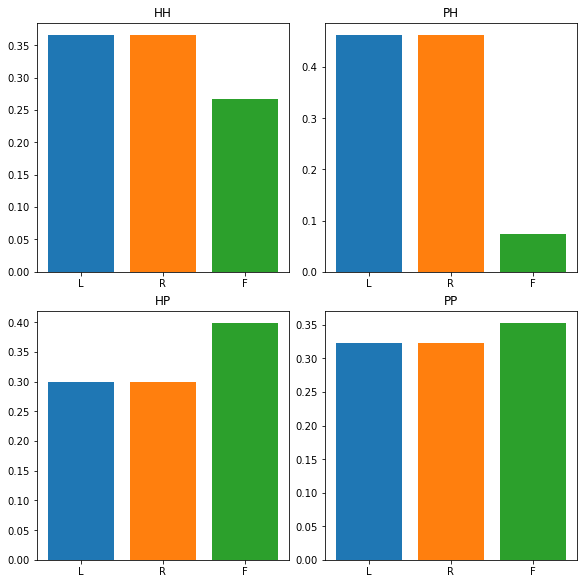

In [179]:
desicion_tree = []
for i,d in enumerate(data2):
    print(f'Altura: {i}')
    df = get_probabilities(d)
    desicion_tree.append(df)
    display(df)
    df.to_pickle(f'models/decision_tree/altura{i}.pkl')
    plot_hists(df)
    plt.show()

In [181]:
cases = {'HH':{'L':[],'R':[],'F':[]},'HP':{'L':[],'R':[],'F':[]},'PH':{'L':[],'R':[],'F':[]},'PP':{'L':[],'R':[],'F':[]}}
directions = 'LRF'
for df in desicion_tree:
    for i,col in enumerate(df.columns):
        for j,row in enumerate(df[col]):
            cases[col][directions[j]].append(row)

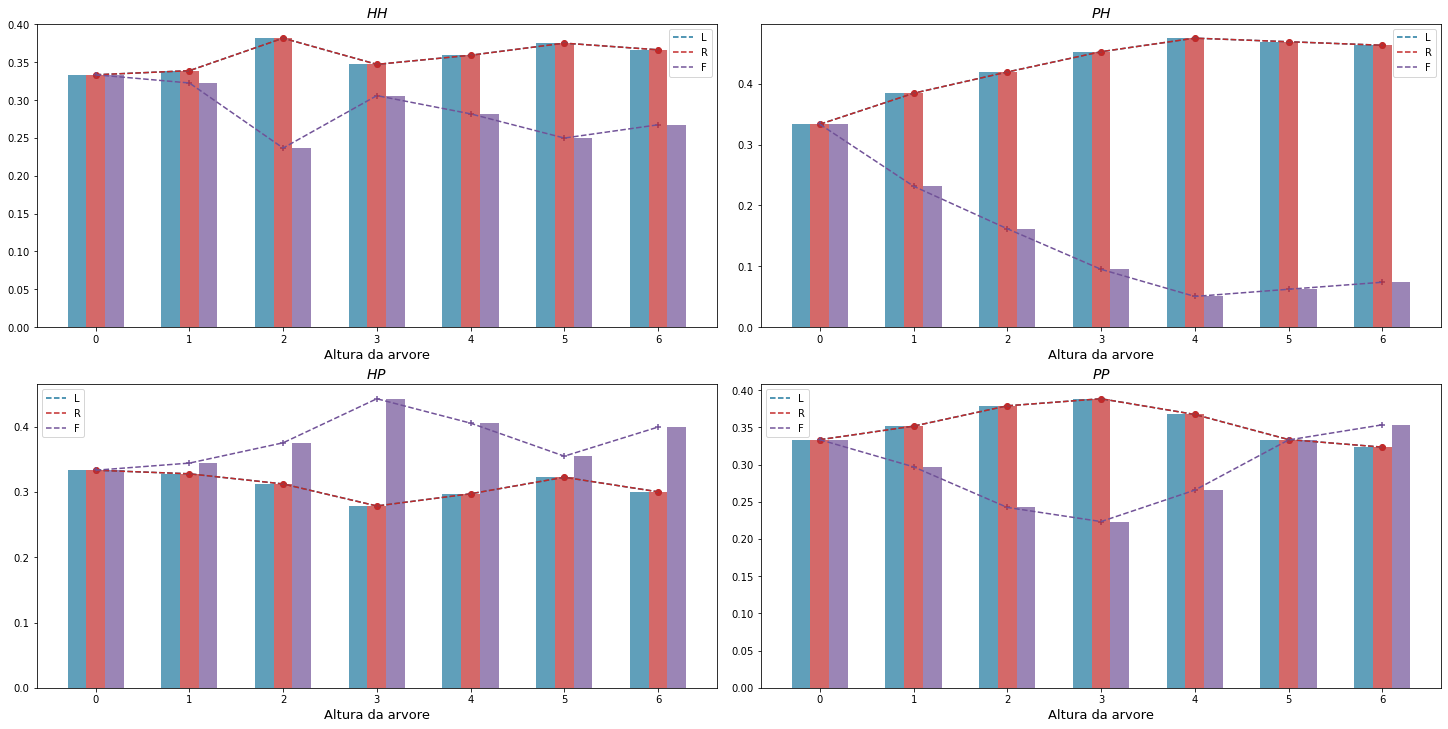

In [198]:
fig,ax = plt.subplots(2,2,figsize=(20,10),constrained_layout=True)
pares = [(0,0),(1,0),(0,1),(1,1)]
m = '*o+'
w = 0.2
for i,case in enumerate(cases.keys()):
    a,b = pares[i]
    ax[a,b].set_title(f'${case}$',fontsize=14)
    for j,d in enumerate(directions):
        ax[a,b].plot(range(7),cases[case][d][:],ls='--',label=d,color=colors[j])
        ax[a,b].scatter(range(7),cases[case][d][:],marker=m[j],color=colors[j])
        for k,val in enumerate(cases[case][d][:]):
            W = w*(j-1)
            ax[a,b].bar(k+W,val,width=w,color=colors[j],alpha=0.7)
        ax[a,b].set_xlabel(f'Altura da arvore',fontsize=13)
    ax[a,b].legend()
PATH = 'C:/Users/reasc/OneDrive - Universidade do Minho (1)/Mestrado/Primer Semestre/PP/probabilistic_programming/Short Talks/Protein Fold 2D/Graficos/'
fig.savefig(PATH+'Decision_Tree.svg')

In [199]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

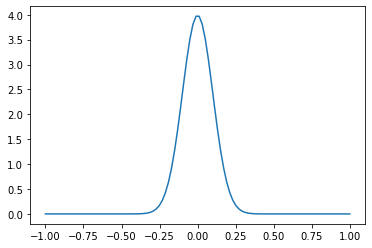

In [200]:
d = tfd.Normal(0,0.1)
x = np.linspace(-1,1,100)
plt.plot(x,d.prob(x))

In [216]:
d.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=-0.06478345>

In [121]:
def calc_functions(x,y):
    negloglik = lambda y, rv_y: -rv_y.log_prob(y)
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
    model.fit(x, y, epochs=1000, verbose=False)
    return model

,w,b
0,0.006034046,0.33990815


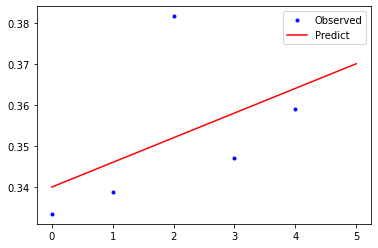

,w,b
0,-0.012144539,0.33416447


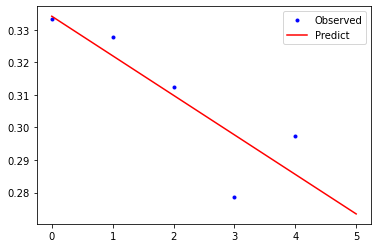

,w,b
0,0.03724804,0.3369921


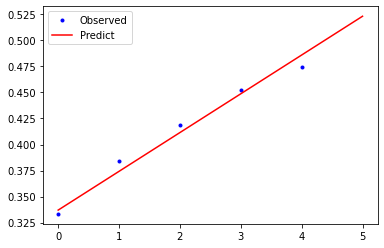

,w,b
0,0.018865962,0.32103884


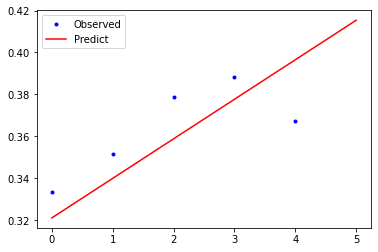

In [127]:
for case in cases.keys():
    x = np.arange(5)
    y = np.array(cases[case]['L'][:5])
    b = 0
    while b < 0.28 or b > 0.34:
        model = calc_functions(x,y)
        w = np.squeeze(model.layers[-2].kernel.numpy())
        b = np.squeeze(model.layers[-2].bias.numpy())
    df = pd.DataFrame([[w,b]],columns=['w','b'])
    display(df)
    df.to_pickle(f'models/decision_tree/{case}.pkl')
    x_tst = np.arange(0,6,dtype= np.float64)
    x_tst = x_tst.reshape((len(x_tst),1))
    yhat = model(x_tst)
    plt.plot(x,y,'b.',label='Observed')
    plt.plot(x_tst,yhat.mean(),label='Predict',color='red')
    plt.legend()
    plt.show()

In [135]:
def C(n,r):
    return np.math.factorial(n)/(np.math.factorial(r)*np.math.factorial(n-r))

In [138]:
def count(N):
    return np.sum([C(N,i) for i in range(3,N)])
        

In [144]:
np.sum([count(i)*3**(i-1) for i in range(5,9)])

559386.0

In [217]:
1100-866

234

In [220]:
150/1.13

132.7433628318584

In [2]:
m1 = '''Random: 0.14814814814814814 - Model: 0.236 Samples: 1000
Random: 0.14814814814814814 - Model: 0.232 Samples: 1000
Random: 0.14814814814814814 - Model: 0.246 Samples: 1000
Random: 0.24691358024691357 - Model: 0.366 Samples: 1000
Random: 0.14814814814814814 - Model: 0.182 Samples: 1000
Random: 0.024691358024691357 - Model: 0.058 Samples: 1000
Random: 0.13168724279835392 - Model: 0.2030178326474623 Samples: 1458
Random: 0.0411522633744856 - Model: 0.04046639231824417 Samples: 1458
Random: 0.0411522633744856 - Model: 0.06515775034293553 Samples: 1458
Random: 0.00823045267489712 - Model: 0.017375400091449476 Samples: 4374
Random: 0.05212620027434842 - Model: 0.08916323731138547 Samples: 4374
Random: 0.0027434842249657062 - Model: 0.016918152720621856 Samples: 4374'''

dt = '''Random: 0.14814814814814814 - Model: 0.209 Samples: 1000
Random: 0.14814814814814814 - Model: 0.205 Samples: 1000
Random: 0.14814814814814814 - Model: 0.204 Samples: 1000
Random: 0.24691358024691357 - Model: 0.314 Samples: 1000
Random: 0.14814814814814814 - Model: 0.195 Samples: 1000
Random: 0.024691358024691357 - Model: 0.052 Samples: 1000
Random: 0.13168724279835392 - Model: 0.2242798353909465 Samples: 1458
Random: 0.0411522633744856 - Model: 0.04252400548696845 Samples: 1458
Random: 0.0411522633744856 - Model: 0.03772290809327846 Samples: 1458
Random: 0.00823045267489712 - Model: 0.010745313214449017 Samples: 4374
Random: 0.05212620027434842 - Model: 0.06721536351165981 Samples: 4374
Random: 0.0027434842249657062 - Model: 0.00823045267489712 Samples: 4374'''

mix = '''Random: 0.14814814814814814 - Model: 0.244 Samples: 1000
Random: 0.14814814814814814 - Model: 0.232 Samples: 1000
Random: 0.14814814814814814 - Model: 0.232 Samples: 1000
Random: 0.24691358024691357 - Model: 0.328 Samples: 1000
Random: 0.14814814814814814 - Model: 0.166 Samples: 1000
Random: 0.024691358024691357 - Model: 0.064 Samples: 1000
Random: 0.13168724279835392 - Model: 0.21193415637860083 Samples: 1458
Random: 0.0411522633744856 - Model: 0.04801097393689986 Samples: 1458
Random: 0.0411522633744856 - Model: 0.04526748971193416 Samples: 1458
Random: 0.00823045267489712 - Model: 0.013488797439414724 Samples: 4374
Random: 0.05212620027434842 - Model: 0.07498856881572931 Samples: 4374
Random: 0.0027434842249657062 - Model: 0.01417466849565615 Samples: 4374'''

In [3]:
import re
r =  re.findall(r'Random: (0.\d+) .+',m1)
m1 = re.findall(r'Model: (0.\d+)',m1)
dt = re.findall(r'Model: (0.\d+)',dt)
mix = re.findall(r'Model: (0.\d+)',mix)

In [4]:
r = [float(m) for m in r]
m1 = [float(m) for m in m1]
dt = [float(m) for m in dt]
mix = [float(m) for m in mix]

In [5]:
cases = ['HPHHP',
 'HHPHP',
 'PHPHH',
 'HHPHHP',
 'HPPHHP',
 'HPHPPH',
 'PPPHPHH',
 'PHPPPHH',
 'PHPPPHH',
 'HPHPPPHH',
 'PHHHHHPH',
 'HPPHPHPH']
len(cases)

12

0
1
2
3
4
5
6
7
8
9
10
11


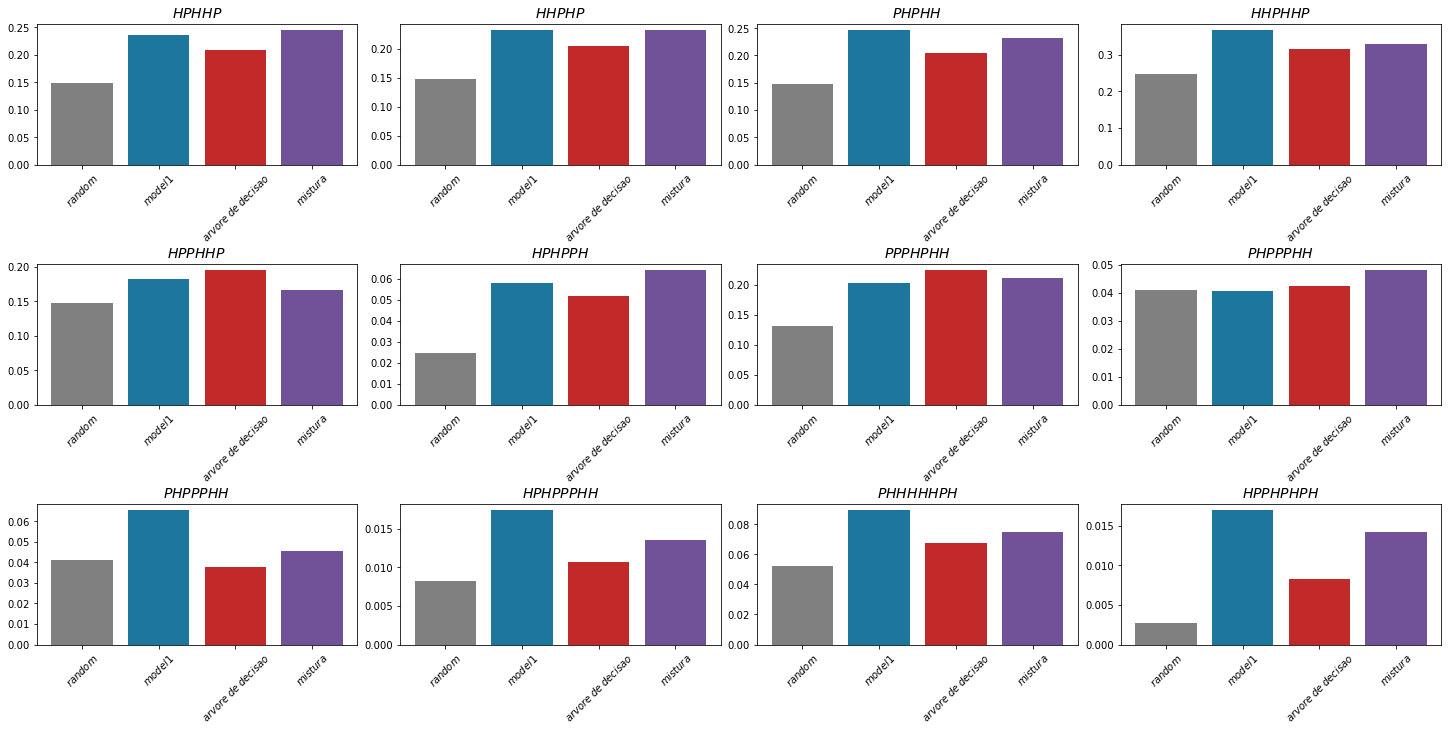

In [12]:
fig, ax = plt.subplots(3,4,figsize=(20,10),constrained_layout=True)
colors = ['gray'] + ['#1C769D','#C22929','#715298']
model = [r,m1,dt,mix]
names = ['random','model1','arvore\;de\;decisao','mistura']
for i in range(3):
    for j in range(4):
        print(i*4+j)
        ax[i][j].set_title(f'${cases[i*4+j]}$',fontsize = 14)
        for k in range(4):
            ax[i][j].bar(k,model[k][i*4+j],color=colors[k])
        ax[i,j].set_xticks(list(range(4)))
        ax[i,j].set_xticklabels([f'${c}$' for c in names],rotation=45)
PATH = 'C:/Users/reasc/OneDrive - Universidade do Minho (1)/Mestrado/Primer Semestre/PP/probabilistic_programming/Short Talks/Protein Fold 2D/Graficos/'
fig.savefig(PATH+'Comparativa.svg',transparent=True)

In [20]:
Inputs = ["HPPHHPH","HPHHHPHHPH","HPPHPPPPHPPHP","HHPHPPHPHPHHPH","HPHHHHHHHHHPHH","HHHPPHHHHHPHHH","HHHHHPPHHHHPHH","HPHHPPPHHHHHHH",
          "HHHPHHPPPHHPHH","HHPHHHHHPPPPPH","HHPPHHHPHPPHPH","HHHPPPPHPHHPHH","HPHPPHHPHPPHPHHPPHPH","HHHPPHPHPHPPHPHPHPPH",
          "HHHHHPHHPHHHHPPHHHHHH","PHPPHPHHHPHPPHPHHHPPH"]

len(Inputs)

16

In [23]:
know = [2,4,4,6,7,7,7,6,6,4,6,5,9,10,12,9]
rigid = [2,4,4,6,7,7,7,6,6,4,6,5,9,10,12,9]
flexible = [2,4,2,5,7,7,6,5,5,4,5,5,4,7,9,4]
greedy = [2,4,4,6,7,7,7,6,6,4,6,5,8,9,11,9]
partial = [2,4,3,6,7,6,6,6,6,4,4,5,6,8,11,7]

In [25]:
M1_1 = [pd.read_pickle(f'data/results/m1{i}.pkl') for i in range(16)]
M1_2 = [pd.read_pickle(f'data/results_2/m1{i}.pkl') for i in range(16)]

In [71]:
def evalueate_model(df,E):
    aux = df.loc[df['energy'] == df['max_energy'][0]]
    aux = aux.groupby('direction').agg(['max', 'count'])
    l = len(aux)
    return {'error':np.abs(E-df['max_energy'][0]),'num_sols':l,'sols':list(aux.index)}

def compare_models(df1,df2,E):
    aux = evalueate_model(df1,E)
    baux = evalueate_model(df2,E)
    if aux['error'] < baux['error']:
        print('1')
        return df1
    if aux['error'] > baux['error']:
        print('2')
        return df2
    if aux['num_sols'] > baux['num_sols']:
        print('1')
        return df1
    print('2')
    return df2

In [73]:
M1 = [compare_models(M1_1[i],M1_2[i],know[i]) for i in range(16)]

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [74]:
DT_1 = [pd.read_pickle(f'data/results_2/dt{i}.pkl') for i in range(16)]
DT_2 = [pd.read_pickle(f'data/results_3/dt{i}.pkl') for i in range(16)]

In [75]:
DT = [compare_models(DT_1[i],DT_2[i],know[i]) for i in range(16)]

2
2
1
1
1
1
2
2
2
1
2
2
1
2
2
1


In [76]:
MIX = [pd.read_pickle(f'data/results_3/mix{i}.pkl') for i in range(16)]

In [80]:
data = []
for i in range(16):
    data.append([Inputs[i],-know[i],-flexible[i],-greedy[i],-partial[i],-M1[i]['max_energy'][0],-DT[i]['max_energy'][0],-MIX[i]['max_energy'][0]])
df = pd.DataFrame(data,columns=['Input','Known lowest energy','Flexible criterion','Greedy algorithm','Partial state space','Modelo1','Arvore de Decisao','Mix'])

In [81]:
df

,Input,Known lowest energy,Flexible criterion,Greedy algorithm,Partial state space,Modelo1,Arvore de Decisao,Mix
0,HPPHHPH,-2,-2,-2,-2,-2,-2,-2
1,HPHHHPHHPH,-4,-4,-4,-4,-4,-4,-4
2,HPPHPPPPHPPHP,-4,-2,-4,-3,-2,-3,-3
3,HHPHPPHPHPHHPH,-6,-5,-6,-6,-5,-5,-5
4,HPHHHHHHHHHPHH,-7,-7,-7,-7,-6,-7,-7
5,HHHPPHHHHHPHHH,-7,-7,-7,-6,-6,-6,-6
6,HHHHHPPHHHHPHH,-7,-6,-7,-6,-5,-7,-6
7,HPHHPPPHHHHHHH,-6,-5,-6,-6,-5,-5,-5
8,HHHPHHPPPHHPHH,-6,-5,-6,-6,-5,-4,-5
9,HHPHHHHHPPPPPH,-4,-4,-4,-4,-4,-4,-4


In [133]:
analise = []
models = [M1,DT,MIX]
sols = []
sols_corrects = []
for model in models:
    data = []
    for i in range(16):
        aux = evalueate_model(model[i],know[i])
        for sol in aux['sols']:
            sols.append([Inputs[i],sol])
            if aux['error'] == 0:
                sols_corrects.append([Inputs[i],sol])
        data.append([Inputs[i],np.round(aux['error']/know[i]*100,2),aux['num_sols']])
    analise.append(pd.DataFrame(data,columns=['Input','Error','Num Sols']))

In [157]:
counts = []
for i in range(16):
    m = []
    for j,model in enumerate(models):
        if analise[j]['Error'][i] == 0:
            m.append(analise[j]['Num Sols'][i]/model[i]['counts'][0])
        else:
            m.append(0/model[i]['counts'][0])
    counts.append(m)
counts = np.array(counts)
print(counts)
[np.mean(counts[:,i]) for i in range(3)]

[[0.00708383 0.0063762  0.00642055]
 [0.01563288 0.01073493 0.01751208]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.00065531 0.00059207]
 [0.         0.         0.        ]
 [0.         0.00055157 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00063052 0.00093327 0.0019656 ]
 [0.         0.00053505 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


[0.0014592013603215751, 0.001236645119735192, 0.001655643207381455]

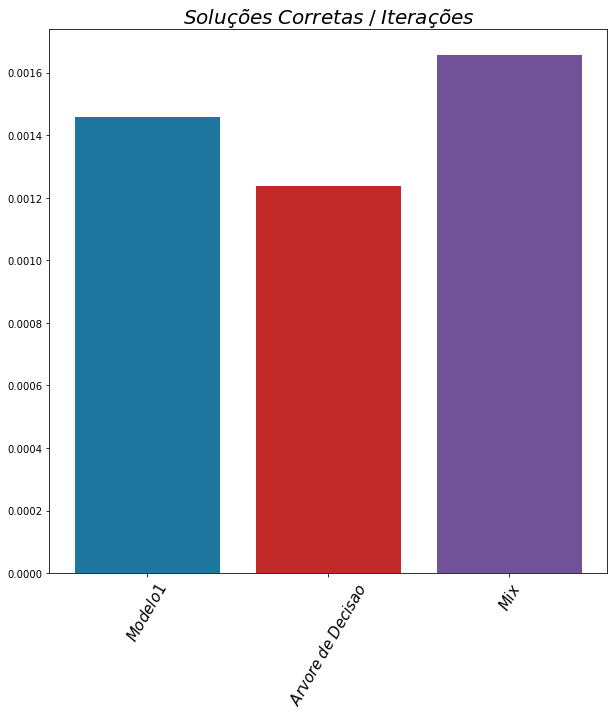

In [165]:
fig, ax = plt.subplots(figsize=(10,10))
colors = ['#1C769D','#C22929','#715298']
ax.set_title('$Soluções\;Corretas\;/\;Iterações$',fontsize=20)
for i in range(3):
    ax.bar(i,np.mean(counts[:,i]),color = colors[i])
ax.set_xticks(list(range(3)))
ax.set_xticklabels([f'${s}$' for s in names[-3:]],rotation=60,fontsize=15);
fig.savefig(PATH+'SOLS_ITER.svg',transparent=True)


In [113]:
compara = [flexible,greedy,partial]
names = ['Known lowest energy','Flexible criterion','Greedy algorithm','Partial state space','Modelo1','Arvore de Decisao','Mix']
erros = [[],[],[],[],[],[]]
correctos = [0,0,0,0,0,0]
for n in range(16):
    for k,c in enumerate(compara):
        erros[k].append(np.abs(c[n]-know[n])/know[n])
        if erros[k][-1] == 0:
            correctos[k] += 1
    for l,c in enumerate(range(k+1,k+len(models)+1)):
        erros[c].append(analise[l]['Error'][n]/100)
        e = analise[l]['Error'][n]/100
        if e == 0:
            correctos[c] += 1

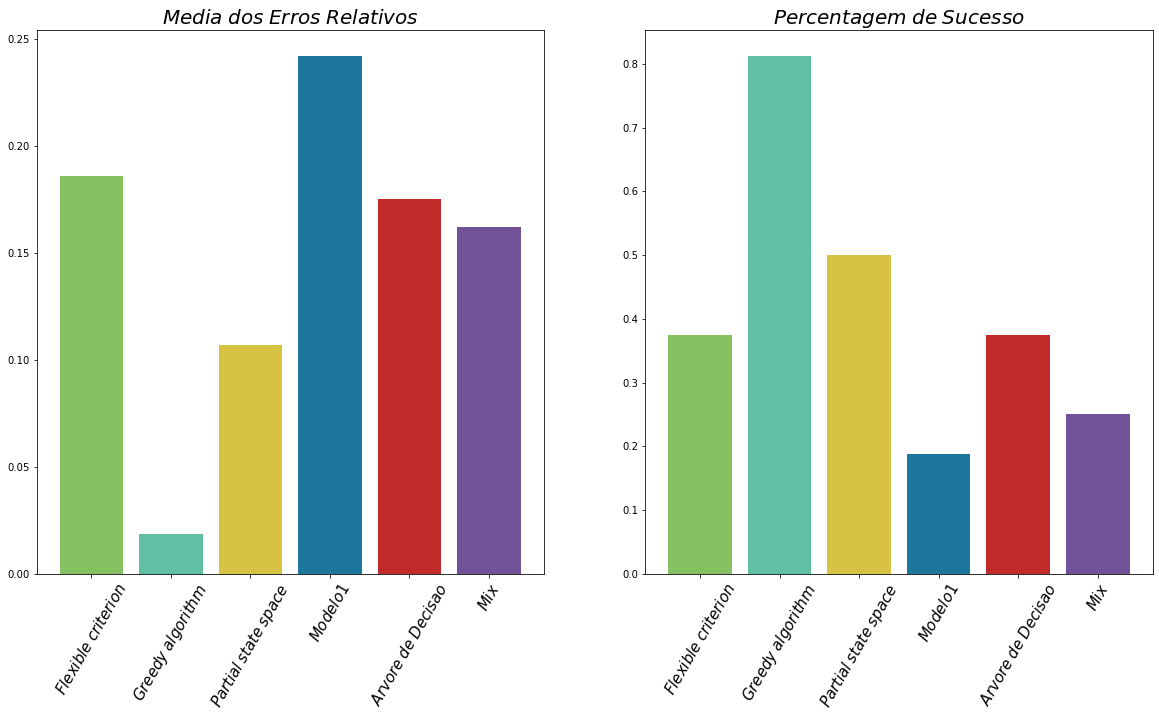

In [130]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
colors = ['#85C061','#61C0A3','#D8C242'] + ['#1C769D','#C22929','#715298']
ax[0].set_title('$Media\;dos\;Erros\;Relativos$',fontsize=20)
ax[1].set_title('$Percentagem\;de\;Sucesso$',fontsize=20)
for i,erro in enumerate(erros):
    ax[0].bar(i,np.mean(erro),color=colors[i])
    ax[1].bar(i,correctos[i]/16,color=colors[i])
ax[0].set_xticks(list(range(6)))
ax[1].set_xticks(list(range(6)))
import re
names = [re.sub(' ',r'\\;',s) for s in names]
ax[0].set_xticklabels([f'${s}$' for s in names[1:]],rotation=60,fontsize=15);
ax[1].set_xticklabels([f'${s}$' for s in names[1:]],rotation=60,fontsize=15);
fig.savefig(PATH+'erros_succeso.svg',transparent=True)

In [158]:
sols_corrects

[['HPPHHPH', 'SFLLFRR'],
 ['HPPHHPH', 'SFLLRLL'],
 ['HPPHHPH', 'SFRRFLL'],
 ['HPPHHPH', 'SFRRLRR'],
 ['HPPHHPH', 'SLLLFRR'],
 ['HPPHHPH', 'SLLLRLL'],
 ['HPPHHPH', 'SLRRFLL'],
 ['HPPHHPH', 'SLRRLRR'],
 ['HPPHHPH', 'SRLLFRR'],
 ['HPPHHPH', 'SRLLRLL'],
 ['HPPHHPH', 'SRRRFLL'],
 ['HPPHHPH', 'SRRRLRR'],
 ['HPHHHPHHPH', 'SFLFFLLFRR'],
 ['HPHHHPHHPH', 'SFLFLRLLFL'],
 ['HPHHHPHHPH', 'SFLLRLLFFL'],
 ['HPHHHPHHPH', 'SFLRFLLFFL'],
 ['HPHHHPHHPH', 'SFRFRLRRFR'],
 ['HPHHHPHHPH', 'SFRRLFLLRL'],
 ['HPHHHPHHPH', 'SLLFFLLRLL'],
 ['HPHHHPHHPH', 'SLLFLRLLFL'],
 ['HPHHHPHHPH', 'SLLLFFLLRR'],
 ['HPHHHPHHPH', 'SLLLRFRFRR'],
 ['HPHHHPHHPH', 'SLLLRFRRLR'],
 ['HPHHHPHHPH', 'SLLLRLLFFL'],
 ['HPHHHPHHPH', 'SLLLRLLFRR'],
 ['HPHHHPHHPH', 'SLLLRLRRFR'],
 ['HPHHHPHHPH', 'SLRLRFRRLR'],
 ['HPHHHPHHPH', 'SLRRFFRRLL'],
 ['HPHHHPHHPH', 'SLRRFLLFFL'],
 ['HPHHHPHHPH', 'SLRRLRRFLL'],
 ['HPHHHPHHPH', 'SLRRLRRLRR'],
 ['HPHHHPHHPH', 'SRLFFLLFRR'],
 ['HPHHHPHHPH', 'SRLLFFLLRL'],
 ['HPHHHPHHPH', 'SRRFFRRFLL'],
 ['HPHHHPHHPH', 'S